In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Assignment1

!ls

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('WHR-2024-5CS037.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Assignment1
AadeshShrestha_2418263_Assignment_1.ipynb  WHR-2024-5CS037.csv


In [ ]:
#1. Load the dataset and display the first 10 rows.
data.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
# 2. Identify the number of rows and columns in the dataset.

rows, columns = data.shape
print(f"\nNumber of rows: {rows}, Number of columns: {columns}")



Number of rows: 143, Number of columns: 9


In [ ]:
 #3. List all the columns and their data types.

print("\nColumns and their data types:")
print(data.dtypes)



Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [ ]:
# 1. Calculate the mean, median, and standard deviation for the Score column.

mean_score = data['score'].mean()
median_score = data['score'].median()
std_dev_score = data['score'].std()
print(f"\nScore Statistics:\nMean: {mean_score}, Median: {median_score}, Standard Deviation: {std_dev_score}")



Score Statistics:
Mean: 5.52758041958042, Median: 5.785, Standard Deviation: 1.1707165099442995


In [ ]:
# 2. Identify the country with the highest and lowest happiness scores.

max_score_country = data.loc[data['score'].idxmax()]
min_score_country = data.loc[data['score'].idxmin()]
print(f"\nCountry with highest score:\n{max_score_country[['Country name', 'score']]}")
print(f"\nCountry with lowest score:\n{min_score_country[['Country name', 'score']]}")



Country with highest score:
Country name    Finland
score             7.741
Name: 0, dtype: object

Country with lowest score:
Country name    Afghanistan
score                 1.721
Name: 142, dtype: object


In [ ]:
 #1. Check if there are any missing values in the dataset. If so, display the total count for each column.

missing_values = data.isnull().sum()
print("\nMissing values in the dataset:")
print(missing_values[missing_values > 0])



Missing values in the dataset:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
 #1. Filter the dataset to show only the countries with a Score greater than 7.5.

high_score_countries = data[data['score'] > 7.5]
print(f"\nCountries with a score greater than 7.5:\n{high_score_countries[['Country name', 'score']]}")





Countries with a score greater than 7.5:
  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525


In [ ]:
 # 2. For the filtered dataset- Sort the dataset by GDP per Capita in descending

top_gdp_countries = high_score_countries.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("\nTop 10 countries with highest GDP per Capita among those with score > 7.5:")
print(top_gdp_countries[['Country name', 'Log GDP per capita']])



Top 10 countries with highest GDP per Capita among those with score > 7.5:
  Country name  Log GDP per capita
1      Denmark               1.908
2      Iceland               1.881
0      Finland               1.844


In [ ]:
 #Adding New Columns:
 #1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:

def happiness_category(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness Category'] = data['score'].apply(happiness_category)
print("\nSample data with new 'Happiness Category' column:")
data.head()

<ipython-input-33-b2dba6555f20>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')


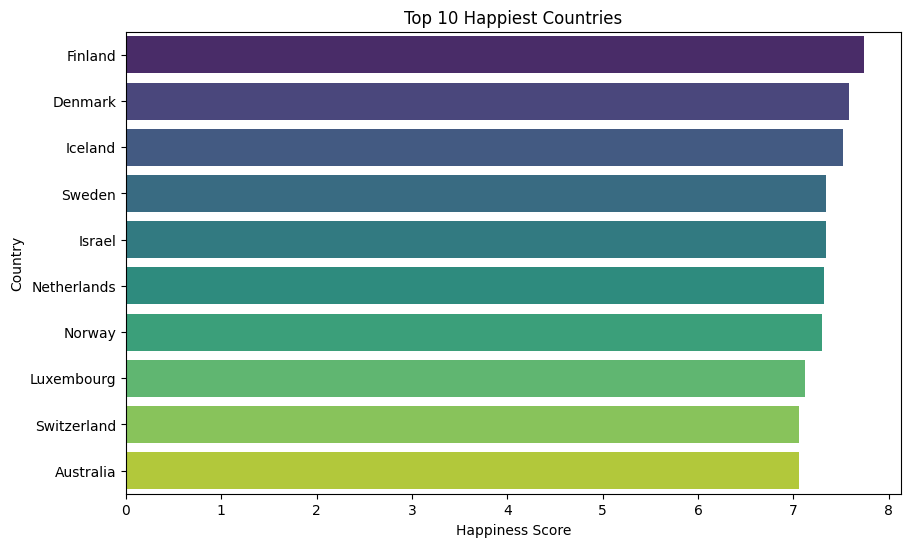

In [ ]:
#Plot the top 10 happiest countries by Score using a bar chart.

top_10_happiest = data.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


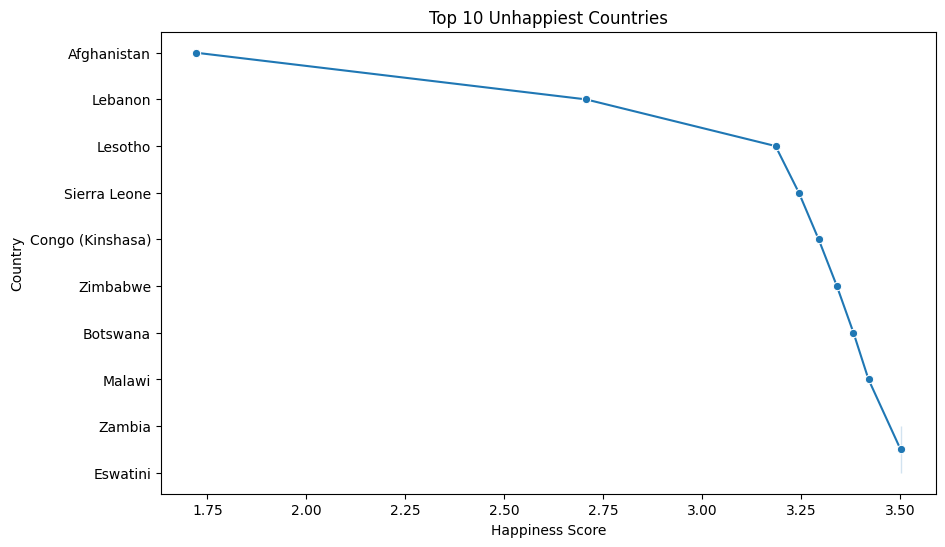

In [ ]:
# Plot the top 10 unhappiest countries by Score using a Line chart.

top_10_unhappiest = data.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
sns.lineplot(x='score', y='Country name', data=top_10_unhappiest, marker='o')
plt.title('Top 10 Unhappiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()



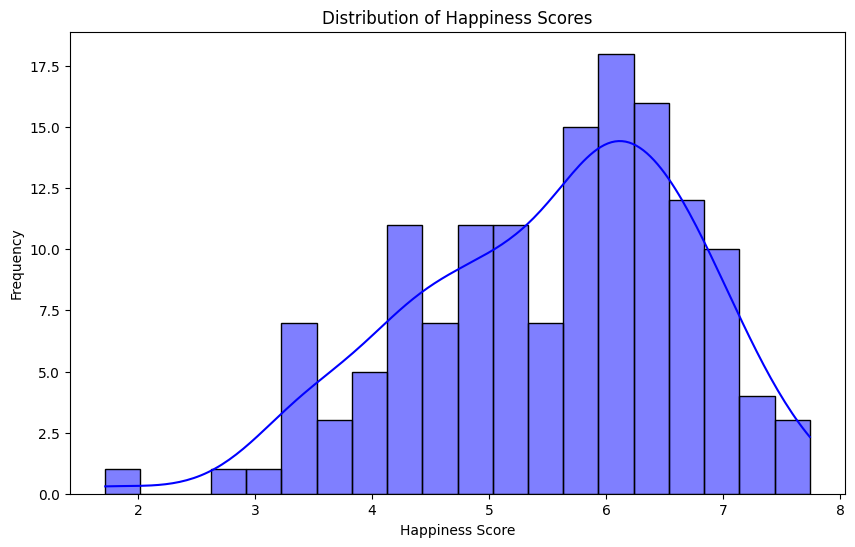

In [ ]:
# Plot a histogram:for the Score column to show its distribution and also interpret.


plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


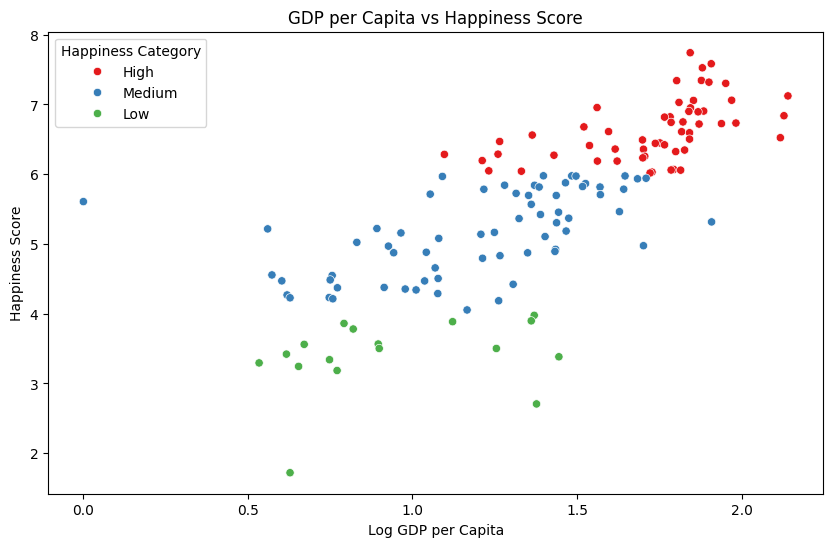

In [ ]:
#Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, hue='Happiness Category', palette='Set1')
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

In [ ]:
#Problem- 2- Some Advance Data Exploration Task:
 #Task- 1- Setup Task- Preparing the South-Asia Dataset:

# List of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Srilanka"]

# Filter the dataset for South Asian countries
south_asia_data = data[data['Country name'].isin(south_asian_countries)]

# Display the filtered dataset
print("\nSouth Asia Dataset:")
print(south_asia_data)

# Save the filtered dataset to a CSV file
output_file_path = 'South_Asia_Dataset.csv'  # Define the output file path
south_asia_data.to_csv(output_file_path, index=False)
print(f"\nSouth Asia dataset saved to {output_file_path}")



South Asia Dataset:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783             Medium  
107      

<ipython-input-38-d122d5066b12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['Composite Score'] = (
<ipython-input-38-d122d5066b12>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=top_5_south_asia, palette='coolwarm')



Ranked South Asia Dataset based on Composite Score:
    Country name  Composite Score  score
92         Nepal           0.8159  5.158
125        India           0.7874  4.054
107     Pakistan           0.7039  4.657
128   Bangladesh           0.6774  3.886
142  Afghanistan           0.3238  1.721


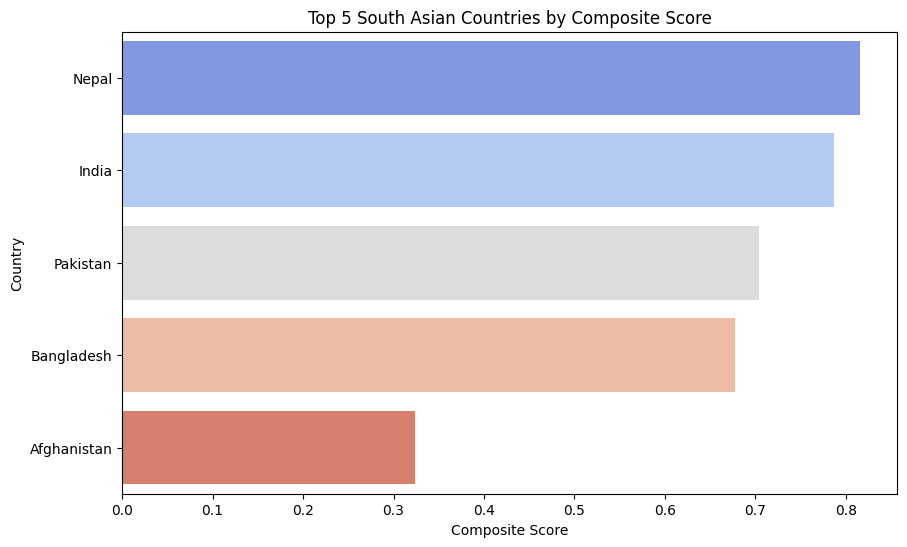

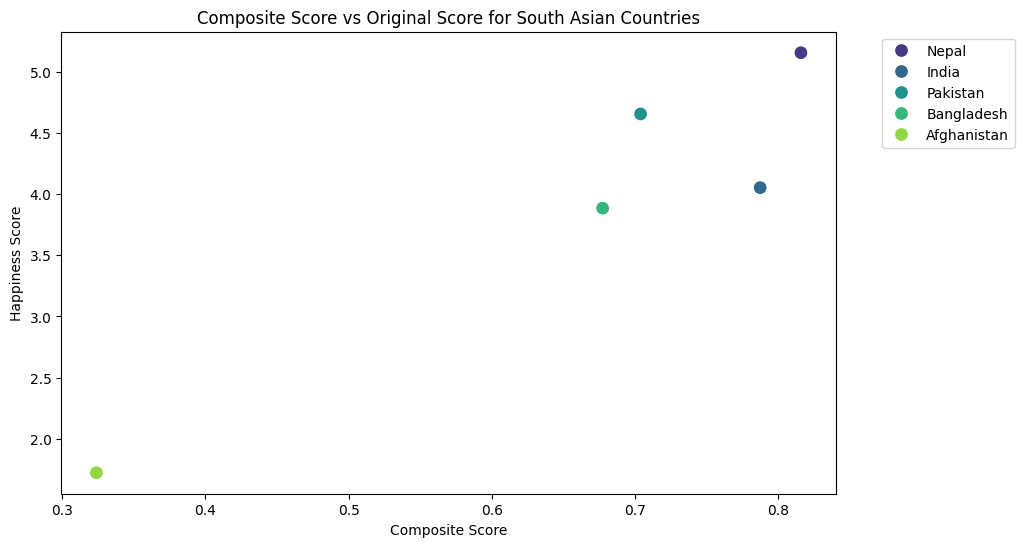

In [ ]:
#Task2
# Step 1: Create a new column for Composite Score
south_asia_data['Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)

# Step 2: Rank South Asian countries based on Composite Score in descending order
south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)

# Display the ranked South Asia dataset
print("\nRanked South Asia Dataset based on Composite Score:")
print(south_asia_data[['Country name', 'Composite Score', 'score']])

# Step 3: Visualize the top 5 countries using a horizontal bar chart
top_5_south_asia = south_asia_data.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_south_asia, palette='coolwarm')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

# Step 4: Visualization to compare Composite Score with original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Composite Score',
    y='score',
    data=south_asia_data,
    hue='Country name',
    palette='viridis',
    s=100
)
plt.title('Composite Score vs Original Score for South Asian Countries')
plt.xlabel('Composite Score')
plt.ylabel('Happiness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The correlation between the initial happiness score and the composite score is displayed in the scatter plot. It is evident that there is no discernible relationship between the two. Comparing the composite score to the original score, some nations rank higher or worse. For instance, Sri Lanka's composite score is high, but its happiness level is rather low. The high GDP per capital may be the cause of this.Despite having a higher happiness score than Sri Lanka, Nepal has a lower composite score, which may be because to its low GDP per capita. These discrepancies demonstrate how the original happiness score may have included additional components not included in our composite score, but the composite score prioritizes particular aspects of wellbeing such as health and economic concerns.

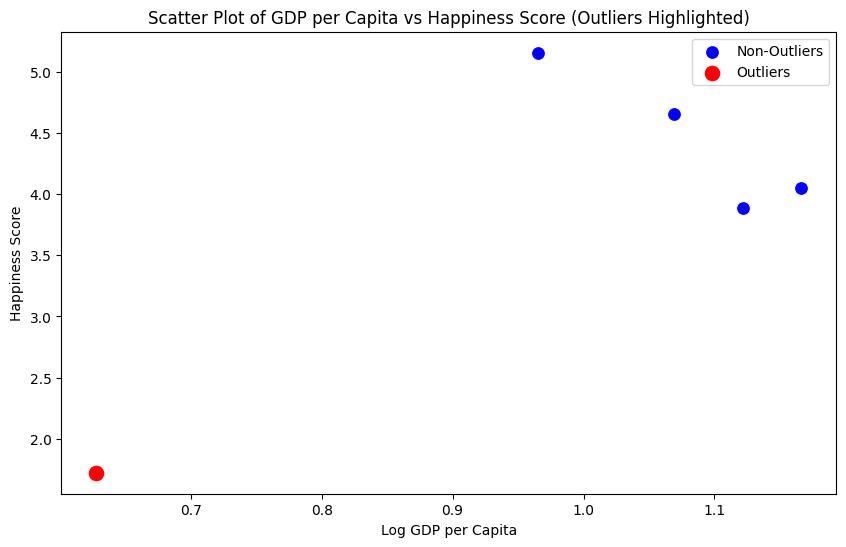


Outlier Countries in South Asia:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


In [ ]:
#Task3


# Step 1: Calculate the 1.5 × IQR rule for Score and GDP per Capita
def identify_outliers(column):
    Q1 = south_asia_data[column].quantile(0.25)
    Q3 = south_asia_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculate outlier thresholds
score_lower, score_upper = identify_outliers('score')
gdp_lower, gdp_upper = identify_outliers('Log GDP per capita')

# Step 2: Identify outliers
south_asia_data['Outlier'] = (
    (south_asia_data['score'] < score_lower) |
    (south_asia_data['score'] > score_upper) |
    (south_asia_data['Log GDP per capita'] < gdp_lower) |
    (south_asia_data['Log GDP per capita'] > gdp_upper)
)

# Separate outliers and non-outliers for visualization
outliers = south_asia_data[south_asia_data['Outlier']]
non_outliers = south_asia_data[~south_asia_data['Outlier']]

# Step 3: Scatter plot with outliers highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=non_outliers,
    label='Non-Outliers',
    color='blue',
    s=100
)
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=outliers,
    label='Outliers',
    color='red',
    s=150
)
plt.title('Scatter Plot of GDP per Capita vs Happiness Score (Outliers Highlighted)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

# Display the identified outliers
print("\nOutlier Countries in South Asia:")
print(outliers[['Country name', 'score', 'Log GDP per capita']])


#Outlier Characteristics:
According to the research, South Asian outlier nations that were found using the Z-score and IQR methodologies have extreme values in either GDP per capita or happiness score, or both.  For instance, some countries may have very low happiness levels but a remarkably high GDP per capita, or vice versa.  individual departures from the overall pattern point to particular socioeconomic conditions in individual nations.

# Potential Impact on Regional Averages:
Outliers have the ability to greatly distort regional averages, especially the mean.  Because the mean is sensitive to extreme values, outliers can cause the regional average to be inflated or deflate, which might give a false impression of the region's average level of happiness or economic prosperity.  The median offers a more reliable indicator of central tendency when outliers are present since it is less vulnerable to extreme values.  In order to describe regional happiness or economic progress in South Asia, it may be deceptive to depend only on the mean; taking into account both the mean and median, as well as displaying the data (as done with the scatter plots), offers a more thorough picture.



Pearson Correlation Coefficients with Happiness Score:
Freedom to make life choices: 0.80
Generosity: 0.88


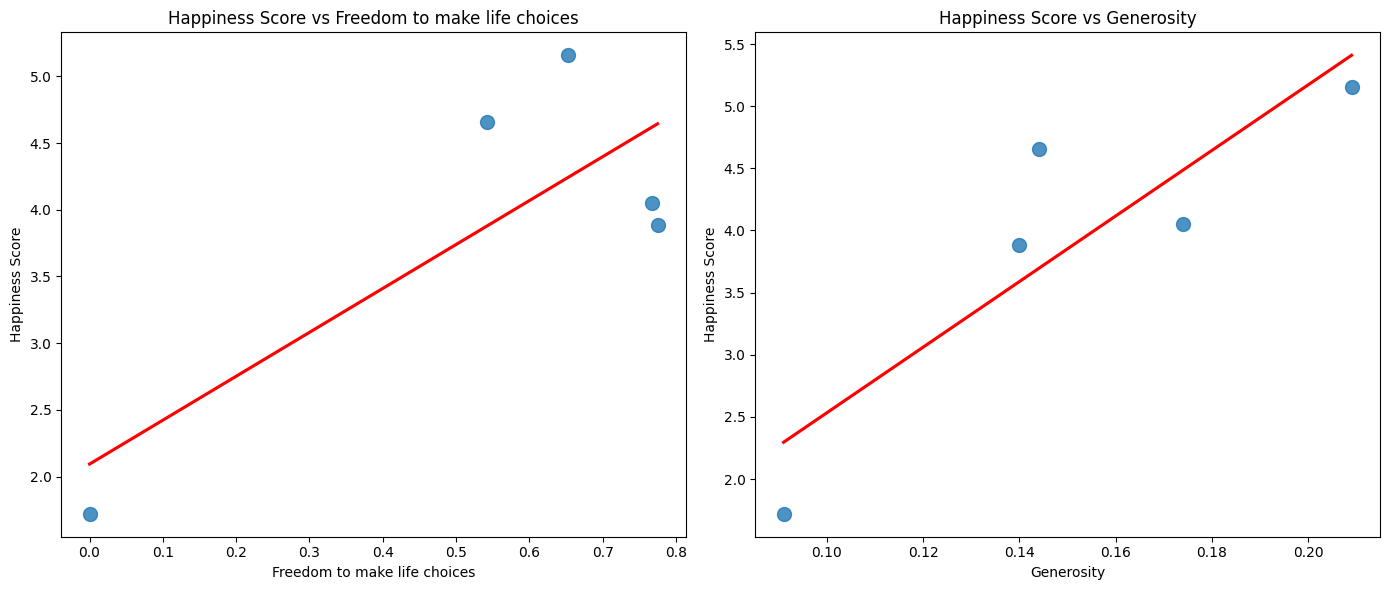


Strongest Relationship: Generosity (Correlation: 0.88)
Weakest Relationship: Freedom to make life choices (Correlation: 0.80)


In [ ]:
#Task4

# Step 1: Choose two metrics
metrics = ['Freedom to make life choices', 'Generosity']

# Calculate Pearson correlation coefficients with Happiness Score
correlations = {metric: south_asia_data['score'].corr(south_asia_data[metric]) for metric in metrics}
print("\nPearson Correlation Coefficients with Happiness Score:")
for metric, corr in correlations.items():
    print(f"{metric}: {corr:.2f}")

# Step 2: Create scatter plots with trendlines for each metric
plt.figure(figsize=(14, 6))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 2, i)
    sns.regplot(
        x=metric,
        y='score',
        data=south_asia_data,
        ci=None,
        scatter_kws={'s': 100},
        line_kws={'color': 'red'}
    )
    plt.title(f'Happiness Score vs {metric}')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')

plt.tight_layout()
plt.show()

# Step 3: Identify strongest and weakest relationships
strongest_metric = max(correlations, key=correlations.get)
weakest_metric = min(correlations, key=correlations.get)

print(f"\nStrongest Relationship: {strongest_metric} (Correlation: {correlations[strongest_metric]:.2f})")
print(f"Weakest Relationship: {weakest_metric} (Correlation: {correlations[weakest_metric]:.2f})")



South Asian Countries Ranked by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
142  Afghanistan         -1.093

South Asian Countries Ranked by GDP-Score Gap (Descending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


<ipython-input-42-148d6f19910b>:27: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(


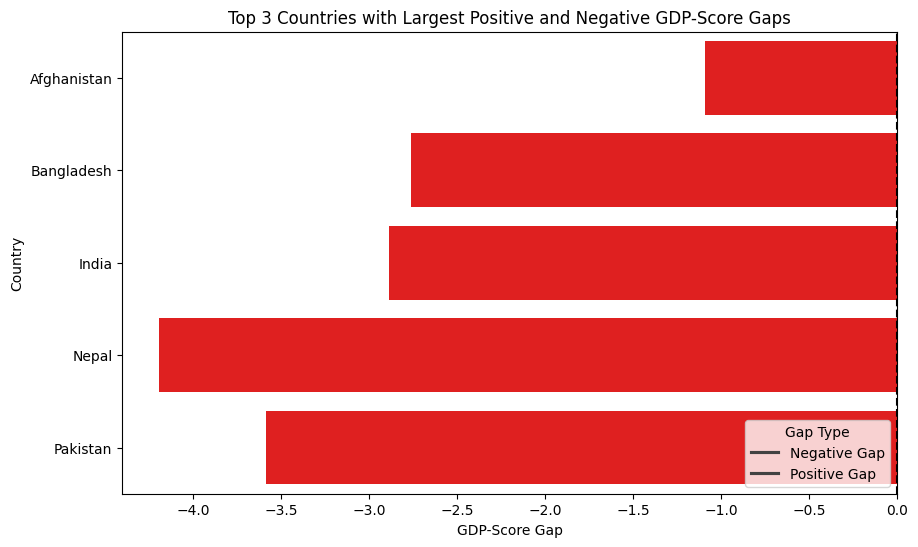

In [ ]:
#Task5

# Step 1: Add a new column for GDP-Score Gap
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

# Step 2: Rank countries by GDP-Score Gap in ascending and descending order
ascending_gap = south_asia_data.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)

print("\nSouth Asian Countries Ranked by GDP-Score Gap (Ascending):")
print(ascending_gap[['Country name', 'GDP-Score Gap']])

print("\nSouth Asian Countries Ranked by GDP-Score Gap (Descending):")
print(descending_gap[['Country name', 'GDP-Score Gap']])

# Step 3: Visualize the top 3 countries with largest positive and negative gaps
top_positive_gap = descending_gap.head(3)
top_negative_gap = ascending_gap.head(3)

# Combine data for visualization
top_gaps = pd.concat([top_positive_gap, top_negative_gap])

# Add a column to distinguish positive and negative gaps
top_gaps['Gap Type'] = top_gaps['GDP-Score Gap'] > 0

plt.figure(figsize=(10, 6))
sns.barplot(
    x='GDP-Score Gap',
    y='Country name',
    data=top_gaps,
    hue='Gap Type',
    palette=['red', 'green']
)
plt.axvline(0, color='black', linestyle='--')
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.legend(title='Gap Type', labels=['Negative Gap', 'Positive Gap'], loc='lower right')
plt.show()


In [ ]:
#problem3

# List of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Creating a DataFrame
data_middle_east = pd.DataFrame(middle_east_countries, columns=["Country"])

# Display the DataFrame
print(data_middle_east)


                 Country
0                Bahrain
1                   Iran
2                   Iraq
3                 Israel
4                 Jordan
5                 Kuwait
6                Lebanon
7                   Oman
8              Palestine
9                  Qatar
10          Saudi Arabia
11                 Syria
12  United Arab Emirates
13                 Yemen
